In [7]:
import mne
import numpy as np
import preProcessRPCA as preprocess
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


""" Perform Robust Principle Component Analysis:
    -Input = [EEG,params]
           EEG = EEG Data (must include)
           lam = Lamda paramter for RPCA (default = 1/(sqrt(# of Colunms))
           tol = Tolerance (defalut = 1e-7) RPCA param
           maxIter = Maximum Iterations (deafult = 1000)
    
    -Output = [Data, Noise]
            Data = Corrected Data
            Noise = Noise removed from the data
            Original EEG = Data + Noise        
    
    -Summary = Performs a Robust Principal Component Analysis on the EEG data with
            the specified parameters: Lamda, Tolerance, and Maximum number of Iterations.
            The function outputs the EEG data with the noise removed as well as the nosie
            that was removed.
"""

def performRPCA(EEG, lam=-1, tol=1e-7, maxIter=1000):
    #Find lamda if not provided using the Automagic algorithim
    col = EEG.shape;
    if (lam == -1): #if no input lamda, calculate its value
        lam = 1 / np.sqrt(col[1])

    #Perform Robust Principal Component Analysis
    data, error = preprocess.rpca(EEG,lam,tol,maxIter)
    return data, error
    

In [15]:
raw = mne.io.read_raw_edf('/Users/raphaelbechtold/Documents/MATLAB/Automagic/automagic/data/Subj1/S001R04.edf')
dat = raw.get_data()
A,E = performRPCA(dat)

Extracting EDF parameters from /Users/raphaelbechtold/Documents/MATLAB/Automagic/automagic/data/Subj1/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


[[-0.00000000e+00  2.18118395e-05  2.23332297e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.63090524e-06  0.00000000e+00 -4.96703516e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.14156557e-06  2.11998180e-05  1.03877689e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.13754165e-06 -0.00000000e+00 -7.35048492e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  5.72541973e-06 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.84415898e-06  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


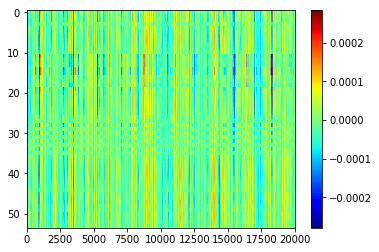

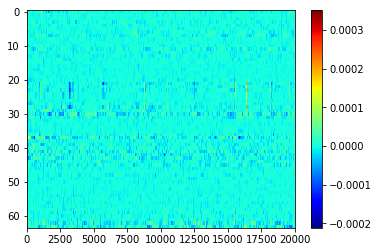

In [21]:
plt.figure()
plt.jet()
A[3:10,::] = -.0003 * np.ones((1,20000))
A = np.delete(A, [3,4,5,6,7,8,9,10],0)
plt.imshow(A,aspect='auto')
plt.colorbar()
plt.figure()
plt.jet()
plt.imshow(E,aspect='auto')
plt.colorbar()
print(E)

In [ ]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(dat)
approximation = pca.inverse_transform(principalComponents)
plt.figure(figsize=(12,5))
plt.plot(dat[::,1],'b')
plt.plot(A[::,1],'r')
plt.plot(approximation[::,1],'y')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Sample pyAutomagic RPCA Ouput vs. normal RPCA output')
plt.legend(['Input EEG','Output Clean EEG', 'Reconstruction with 1 principal components'],loc=4)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dat)
approximation = pca.inverse_transform(principalComponents)
plt.figure(figsize=(12,5))
plt.plot(dat[::,1],'b')
plt.plot(A[::,1],'r')
plt.plot(approximation[::,1],'y')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Sample pyAutomagic RPCA Ouput vs. normal RPCA output')
plt.legend(['Input EEG','Output Clean EEG', 'Reconstruction with 2 principal components'],loc=4)

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dat)
approximation = pca.inverse_transform(principalComponents)
plt.figure(figsize=(12,5))
plt.plot(dat[::,1],'b')
plt.plot(A[::,1],'r')
plt.plot(approximation[::,1],'y')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Sample pyAutomagic RPCA Ouput vs. normal RPCA output')
plt.legend(['Input EEG','Output Clean EEG', 'Reconstruction with 3 principal components'],loc=4)

In [ ]:
EEG = np.array([[1,2,3,4,5,6,7],[1,2,-30,6,15,39,92]])
A,E = performRPCA(EEG)
print(A)
print(E)

In [ ]:
EEG = np.array([[1,2,3],[4,5,6],[7,8,9]])
lam = .5
tol = 1e-10
maxIter = 1000
A,E = performRPCA(EEG,lam,tol,maxIter)
print(A,E)